### Required Libraries

In [1]:
# Data Wrangling
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
from sklearn.impute import SimpleImputer


## Data Load & Preparation

The purpose of this section is to load and gain a general understanding of the data, inlcuding handling missing values.

In [3]:
# URL of the CSV file
url = 'https://raw.githubusercontent.com/redbackoperations/Projects/main/Sports%20Performance%20Analysis/frontend/Cycling%20Analysis/data/extended_activities.csv'

# Read the CSV file directly from the URL
df = pd.read_csv(url)

# Display the first 10 rows
df.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,...,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr
0,2929442069,"13 Dec 2019, 01:46:07",Lunch Ride,Ride,3859,22.97,139.0,11.0,False,NaN,...,412.9,342.1,221.2,162.2,136.3,120.8,109.8,105.4,0.0,0.0
1,2945780637,"20 Dec 2019, 23:05:01",Morning Ride,Ride,4852,29.65,133.0,12.0,False,NaN,...,342.1,236.1,184.3,150.6,131.4,122.1,120.3,115.6,0.0,0.0
2,2948028275,"21 Dec 2019, 23:25:29",Morning Ride,Ride,5817,32.38,139.0,19.0,False,NaN,...,390.5,265.1,213.3,146.2,135.1,127.5,125.5,110.2,104.7,0.0
3,2952462113,"24 Dec 2019, 01:19:17",Lunch Ride,Ride,3851,21.68,140.0,11.0,False,NaN,...,452.0,303.1,262.0,161.9,146.7,139.7,134.0,112.3,0.0,0.0
4,2956494096,"26 Dec 2019, 00:09:08",Lunch Ride,Ride,5843,32.36,131.0,14.0,False,NaN,...,342.9,243.9,208.3,134.7,124.0,119.4,115.5,99.8,96.9,0.0


In [4]:
# Isolate the running data component
df_run = df[df['Activity Type'] == 'Run']

df_run.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,...,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr
89,7057073739,"28 Apr 2022, 21:49:44",Morning Run,Run,4127,12.77,178.0,78.0,False,NaN,...,296.8,271.9,259.4,247.5,242.9,241.5,239.5,235.6,0.0,0.0
90,7067754767,"1 May 2022, 00:11:03",Morning Run,Run,7723,24.63,173.0,185.0,False,NaN,...,376.5,343.7,326.4,316.3,315.0,297.3,291.1,280.1,275.8,272.1
91,7073448977,"1 May 2022, 23:04:26",Morning Run,Run,4202,12.51,182.0,255.0,False,NaN,...,342.0,300.0,282.7,267.1,262.4,261.1,258.3,253.2,0.0,0.0
92,7083686840,"3 May 2022, 20:34:15",Morning Run,Run,4086,12.72,188.0,276.0,False,NaN,...,326.0,302.3,287.4,275.5,270.9,269.0,267.2,263.4,0.0,0.0
93,7094718079,"5 May 2022, 21:44:27",Morning Run,Run,4290,13.09,184.0,241.0,False,NaN,...,320.9,315.3,306.2,271.2,269.9,263.9,264.2,258.8,0.0,0.0


In [5]:
df_run.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 89 to 344
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Activity ID                164 non-null    int64  
 1   Activity Date              164 non-null    object 
 2   Activity Name              164 non-null    object 
 3   Activity Type              164 non-null    object 
 4   Elapsed Time               164 non-null    int64  
 5   Distance                   164 non-null    float64
 6   Max Heart Rate             164 non-null    float64
 7   Relative Effort            164 non-null    float64
 8   Commute                    164 non-null    bool   
 9   Activity Gear              0 non-null      object 
 10  Filename                   164 non-null    object 
 11  Athlete Weight             0 non-null      float64
 12  Bike Weight                0 non-null      float64
 13  Moving Time                164 non-null    float64
 14

### **Basic Data Summary**

In [6]:
#Basic data summarisation
run_sum = df_run.describe()
run_sum

,Activity ID,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Athlete Weight,Bike Weight,Moving Time,Max Speed,Average Speed,...,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr
count,1.640000e+02,164.000000,164.000000,164.000000,164.000000,0.0,0.0,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,8.211358e+09,4390.871951,12.584268,178.237805,152.810976,NaN,NaN,4211.518293,6.247638,2.981124,...,330.110366,299.445122,283.110366,264.346341,259.372561,254.860976,250.423780,144.715244,57.718293,24.101220
std,7.392044e+08,2052.552196,5.369254,10.528875,106.591449,NaN,NaN,1771.775123,6.017020,0.135569,...,44.215151,25.384166,21.508408,18.551373,17.484031,16.428535,25.328194,125.679284,105.583782,73.598314
min,7.057074e+09,1506.000000,4.060000,140.000000,6.000000,NaN,NaN,1506.000000,3.233984,2.696547,...,253.500000,248.100000,240.700000,234.900000,232.600000,229.300000,0.000000,0.000000,0.000000,0.000000
25%,7.759300e+09,3015.500000,8.475000,174.750000,68.750000,NaN,NaN,2987.750000,3.994507,2.895473,...,298.200000,281.025000,268.250000,251.450000,247.875000,243.450000,241.350000,0.000000,0.000000,0.000000
50%,8.146922e+09,4016.500000,12.000000,178.000000,130.500000,NaN,NaN,3875.500000,4.400000,2.980313,...,322.250000,297.950000,280.450000,262.600000,257.500000,252.000000,249.700000,236.400000,0.000000,0.000000
75%,8.611014e+09,5236.250000,15.362500,184.000000,225.500000,NaN,NaN,4976.250000,5.200000,3.057861,...,351.100000,317.550000,294.725000,271.300000,265.700000,262.750000,259.650000,254.050000,0.000000,0.000000
max,1.027158e+10,16615.000000,28.870000,210.000000,528.000000,NaN,NaN,9936.000000,45.083332,3.596129,...,477.400000,367.600000,342.800000,323.300000,319.300000,315.700000,301.500000,289.800000,287.600000,272.100000


#### **Key Insights**
- **Activity ID**: Unique identifier for each activity.
- **Elapsed Time**: Varies significantly, with a mean of approximately 4,390 seconds.
- **Distance**: The average distance run is about 12.58 km, with a standard deviation of 5.37 km.
- **Max Heart Rate**: Averages around 178 bpm.
- **Relative Effort**: Shows significant variability, with a mean of 152.81.
- **Other Metrics**: Includes speed, power, and additional performance metrics.


### **Missing Values**

In [7]:
# Sum the total rows of missing values from each attribute
missing_values = df_run.isnull().sum()

# Return only attrbutes with missing values
missing_values[missing_values > 0]

Activity Gear                164
Athlete Weight               164
Bike Weight                  164
Elevation Loss                 1
Elevation Low                  1
Elevation High                 1
Average Temperature          155
Total Work                   147
Perceived Exertion           164
Prefer Perceived Exertion    164
Perceived Relative Effort    164
Grade Adjusted Distance        1
Total Steps                  156
dtype: int64

#### **Key Insights**:
- **Activity Gear**: All entries are missing.
- **Athlete Weight**: All entries are missing.
- **Bike Weight**: All entries are missing which is expected as this is not relevant for running.
- **Average Temperature**: Missing in 155 out of 164 entries.
- **Total Work**: Missing in 147 out of 164 entries.
- **Perceived Exertion and Related Fields**: All entries are missing.
- **Total Steps**: Missing in 156 out of 164 entries.

#### **Handling Missing Values**

Firstly, any attributes where more than 50% of the data was missing have been removed. This threshold was chosen because columns missing a majority of their data can introduce significant bias and are generally unreliable for drawing meaningful conclusions. Retaining these attributes would not only skew the analysis but could also lead to erroneous interpretations. Additionally, columns with such a high degree of missing data often contain little actionable information, making their exclusion a logical choice.

Secondly, for attributes with less than 50% missing values, a distribution analysis was conducted and resulting in a median imputation. This strategy was chosen as it preserves the underlying distribution of the data, especially in cases of skewed data, and is less sensitive to outliers. Median imputation was particularly suitable for columns such as 'Elevation Loss', 'Elevation Low', 'Elevation High', and 'Grade Adjusted Distance'. By imputing the missing values in this manner, the dataset's integrity and quality is maintained. This is vital for time-series data like this running dataset, where maintaining the continuity and completeness of each record is key for accurate trend analysis and pattern recognition.

**Attributes Missing >50% of Data**

In [8]:
# Remove attributes where 50% or more data is missing
null_threshold = len(df_run) * 0.5
df_run_clean = df_run.dropna(thresh=null_threshold, axis=1)

**Attributes Missing <50% of Data**

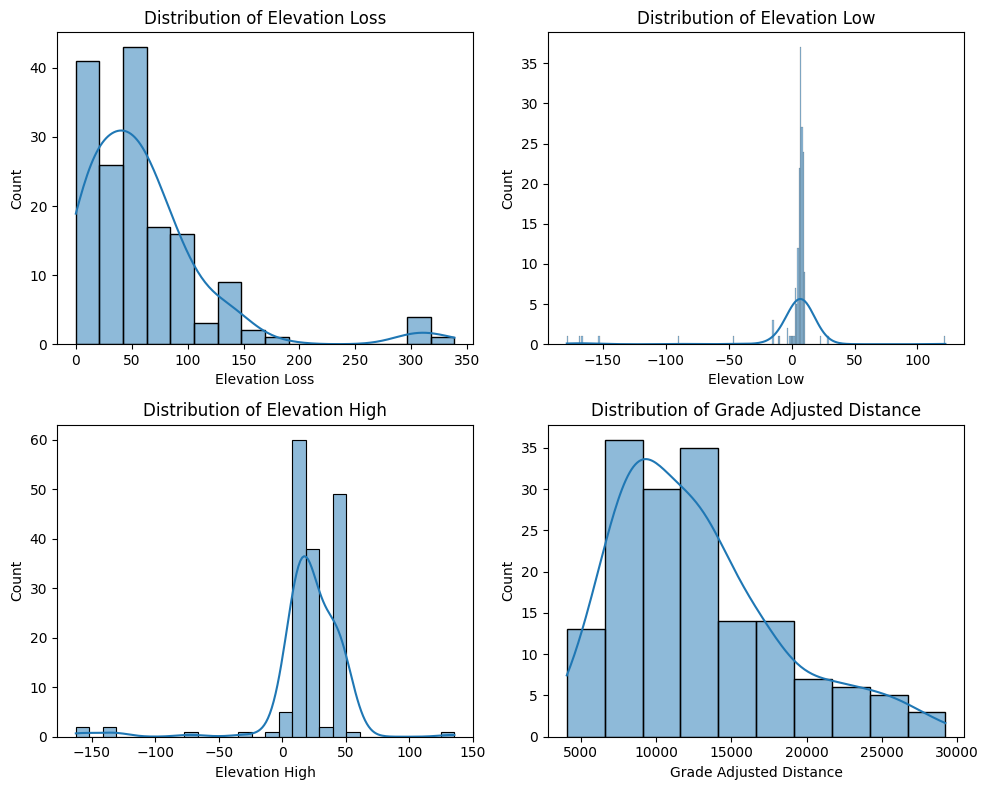

In [9]:
# Columns containing missing val less than 50% of attribute
missing_val_cols = df_run_clean.columns[(df_run_clean.isnull().mean() > 0) & (df_run_clean.isnull().mean() < 0.5)].tolist()

# Plot distributions of attributes less than 50%
plt.figure(figsize=(10,8))

for i, col in enumerate(missing_val_cols, 1):
    plt.subplot(2, 2, i)
    # Drop na for the purposes of the distribution analysis
    sns.histplot(df_run_clean[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

**Key Distribution Insights**

- **Elevation Loss**: The distribution is right-skewed, indicating that most of the runs have a lower elevation loss, with a few runs showing significant elevation loss.
- **Elevation Low**: This distribution also appears to be right-skewed. It suggests that for most runs, the lowest elevation point is not very low, with only a few runs reaching lower elevations.
- **Elevation High**: Similar to the previous metrics, this distribution is right-skewed. Most runs reach a moderately high elevation, with fewer runs reaching much higher elevations.
- **Grade Adjusted Distance**: This distribution is somewhat right-skewed. Most runs have shorter grade-adjusted distances, with fewer runs having significantly longer distances.

In [45]:
imputer = SimpleImputer(strategy='median')
df_run_clean[missing_val_cols] = imputer.fit_transform(df_run_clean[missing_val_cols])

df_run_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 89 to 344
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Activity ID              164 non-null    int64  
 1   Activity Date            164 non-null    object 
 2   Activity Name            164 non-null    object 
 3   Activity Type            164 non-null    object 
 4   Elapsed Time             164 non-null    int64  
 5   Distance                 164 non-null    float64
 6   Max Heart Rate           164 non-null    float64
 7   Relative Effort          164 non-null    float64
 8   Commute                  164 non-null    bool   
 9   Filename                 164 non-null    object 
 10  Moving Time              164 non-null    float64
 11  Max Speed                164 non-null    float64
 12  Average Speed            164 non-null    float64
 13  Elevation Gain           164 non-null    float64
 14  Elevation Loss           164 n

C:\Users\mhollington.AAS\AppData\Local\Temp\ipykernel_27840\102161449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run_clean[missing_val_cols] = imputer.fit_transform(df_run_clean[missing_val_cols])


## Exploratory Data Analysis

In [10]:
df_run_clean['Activity Date'] = pd.to_datetime(df_run_clean['Activity Date'], format='%d %b %Y, %H:%M:%S')

# Preparing data for time series analysis
df_run_clean['Month'] = df_run_clean['Activity Date'].dt.month
df_run_clean['Weekday'] = df_run_clean['Activity Date'].dt.weekday
df_run_clean['Year'] = df_run_clean['Activity Date'].dt.year


# Average metrics by month
avg_metrics_month = df_run_clean.groupby('Month')[['Distance', 'Average Speed', 'Calories']].mean()

# Average metrics by weekday
avg_metrics_weekday = df_run_clean.groupby('Weekday')[['Distance', 'Average Speed', 'Calories']].mean()

C:\Users\mhollington.AAS\AppData\Local\Temp\ipykernel_30868\3166914951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run_clean['Activity Date'] = pd.to_datetime(df_run_clean['Activity Date'], format='%d %b %Y, %H:%M:%S')
C:\Users\mhollington.AAS\AppData\Local\Temp\ipykernel_30868\3166914951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run_clean['Month'] = df_run_clean['Activity Date'].dt.month
C:\Users\mhollington.AAS\AppData\Local\Temp\ipykernel_30868\3166914951.py:5: SettingWithCopyWarn

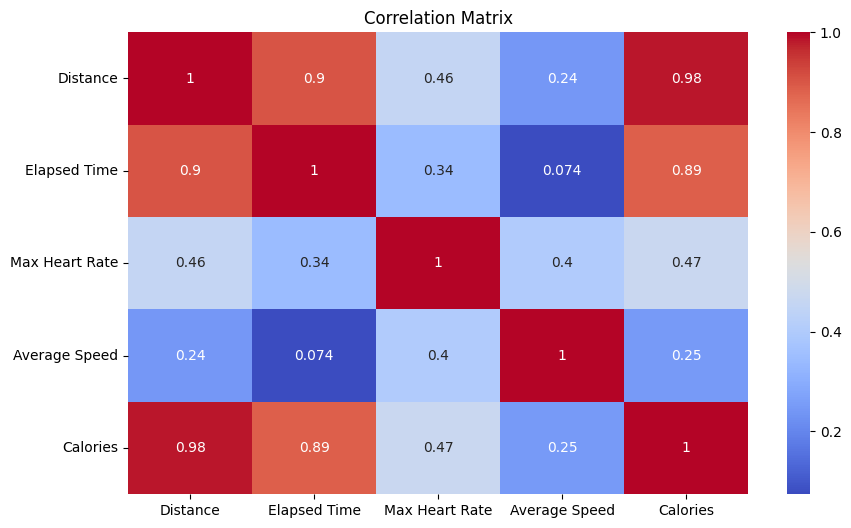

In [54]:
# Correlation Analysis
corr_matrix = df_run_clean[['Distance', 'Elapsed Time', 'Max Heart Rate', 'Average Speed', 'Calories']].corr()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix , annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Distance and Calories (Correlation = 0.983)**:There's a very strong positive correlation between the distance covered and the calories burned. This indicates that as the distance of a run increases, the calories burned also increase significantly.

**Distance and Elapsed Time (Correlation = 0.903)**: A strong positive correlation exists between the distance covered and the elapsed time. This is expected as longer distances generally take more time to complete.

**Calories and Elapsed Time (Correlation = 0.887)**: There's also a strong positive correlation between the calories burned and the elapsed time. This suggests that longer runs tend to burn more calories.

**Distance and Max Heart Rate (Correlation = 0.456)**:  A moderate positive correlation is observed between the distance and the maximum heart rate. This could imply that longer runs may involve periods of higher heart rate, though the relationship isn't as strong as with distance and calories or time.

**Average Speed and Other Metrics**: The correlations between average speed and other metrics like distance (0.243), calories (0.248), and elapsed time (0.074) are relatively low. This indicates that average speed is not as strongly connected to the distance covered, calories burned, or duration of the run as these other factors are to each other.

**Max Heart Rate and Average Speed (Correlation = 0.403)**: There is a moderate positive correlation between max heart rate and average speed, suggesting that faster runs tend to be associated with higher heart rates.

In summary, the most significant relationships in this dataset are between the distance of runs and both calories burned and elapsed time. These correlations suggest that in this dataset, the longer the run, the more calories are burned, and the more time is spent running. Average speed, while an important metric, shows less correlation with other factors in this dataset, indicating it may be influenced by a variety of other factors not captured in these metrics

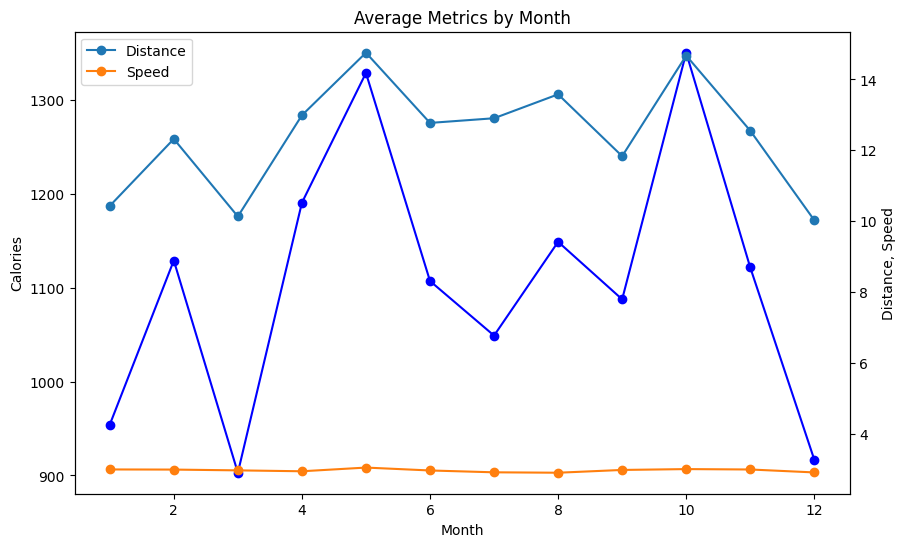

In [53]:
# Average Metrics by Month with Speed and Distance on the Right Axis
plt.figure(figsize=(10, 6))
ax = avg_metrics_month['Calories'].plot(color='blue', marker='o')
plt.ylabel('Calories')

# Twin axis for speed and distance
ax2 = ax.twinx()
avg_metrics_month[['Distance', 'Average Speed']].plot(ax=ax2, marker='o')

plt.title("Average Metrics by Month")
plt.xlabel("Month")
ax.set_ylabel('Calories')
ax2.set_ylabel('Distance, Speed')
plt.legend(['Distance', 'Speed'], loc='upper left')
plt.show()

The 'Average Metrics by Month' chart provides a visual correlation between the distance covered and the number of calories burned, and we can draw several insights:

- **Correlation Between Distance and Calories**: Generally, there appears to be a positive correlation between the distance covered and the number of calories burned. This is expected since longer distances typically require more energy, thus burning more calories.
- **Seasonal Variations**: The changes in these metrics throughout the year could be influenced by several factors:
    - **Weather and Seasonal Conditions**: In milder months, runners might be more inclined to run longer distances, leading to higher calorie burn. Conversely, in extreme weather (hot summers or cold winters), running might be less frequent or shorter in distance.
    - **Personal Schedules and Motivation**: People's schedules and motivation for running can change throughout the year. For example, New Year's resolutions might lead to increased activity in early months, or training for specific events might impact running habits.
- **Training Intensity and Rest Periods**: The training cycles of a runner, including periods of high intensity and rest or recovery phases, can also affect monthly performance. For instance, if a runner is in a high-intensity training phase, they might cover more distance, thus burning more calories.
- **Adaptation and Fitness Levels**: Over the year, as runners improve their fitness levels, they may run more efficiently. This could mean covering longer distances without a proportional increase in calorie burn, as their bodies become more adept at conserving energy during runs.

C:\Users\mhollington.AAS\AppData\Local\Temp\ipykernel_30868\2518981437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run_clean['Elapsed Time (min)'] = df_run_clean['Elapsed Time'] / 60
C:\Users\mhollington.AAS\AppData\Local\Temp\ipykernel_30868\2518981437.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run_clean['Pace (min/km)'] = df_run_clean['Elapsed Time (min)'] / df_run_clean['Distance']


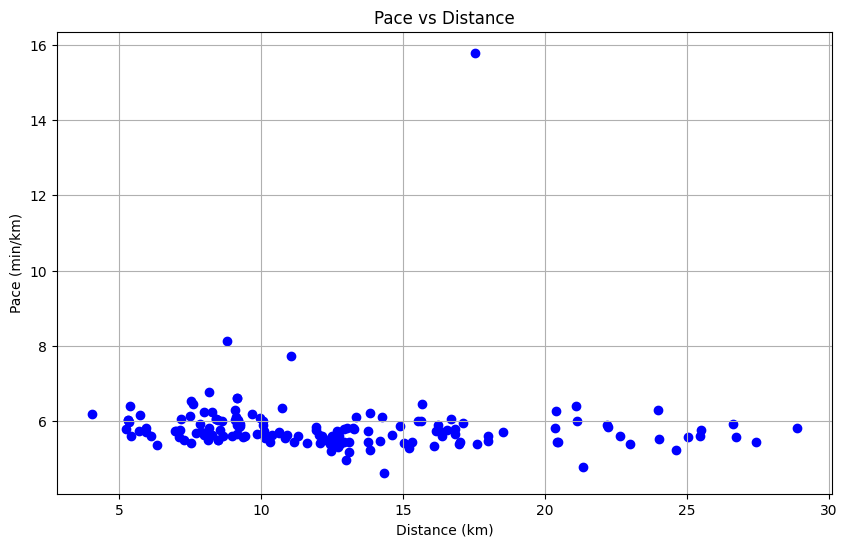

-0.02994529995950148

In [13]:
# Convert 'Elapsed Time' from seconds to minutes
df_run_clean['Elapsed Time (min)'] = df_run_clean['Elapsed Time'] / 60

# Calculate pace (minutes per kilometer)
df_run_clean['Pace (min/km)'] = df_run_clean['Elapsed Time (min)'] / df_run_clean['Distance']

# Analyzing pace over distance
# Group by distance and calculate the average pace
pace_distance_analysis = df_run_clean.groupby('Distance')['Pace (min/km)'].mean().reset_index()

# Correlation between Pace and Distance
correlation_pace_distance = df_run_clean[['Pace (min/km)', 'Distance']].corr().iloc[0,1]

# Scatter Plot for visual analysis
plt.figure(figsize=(10, 6))
plt.scatter(df_run_clean['Distance'], df_run_clean['Pace (min/km)'], color='blue')
plt.xlabel('Distance (km)')
plt.ylabel('Pace (min/km)')
plt.title('Pace vs Distance')
plt.grid(True)
plt.show()

correlation_pace_distance


- **Pace Calculation**: The pace (minutes per kilometer) for each run has been calculated and analysed in relation to the total distance of the run.
- **Pace vs. Distance Relationship**:
    - The scatter plot visualises the relationship between the pace and the total distance covered in each run. It appears that there isn't a strong or clear trend between these two variables.
    - The correlation coefficient between pace and distance is approximately -0.03, indicating a very weak negative relationship. This suggests that, overall, there isn't a significant correlation between the pace and the distance run in this dataset.
- **Analysis by Distance Group**: The table shows the average pace for different distances. This data can be insightful to understand how pace varies across runs of different lengths. However, due to the weak correlation, it seems that the pace does not consistently increase or decrease with distance in a predictable manner.

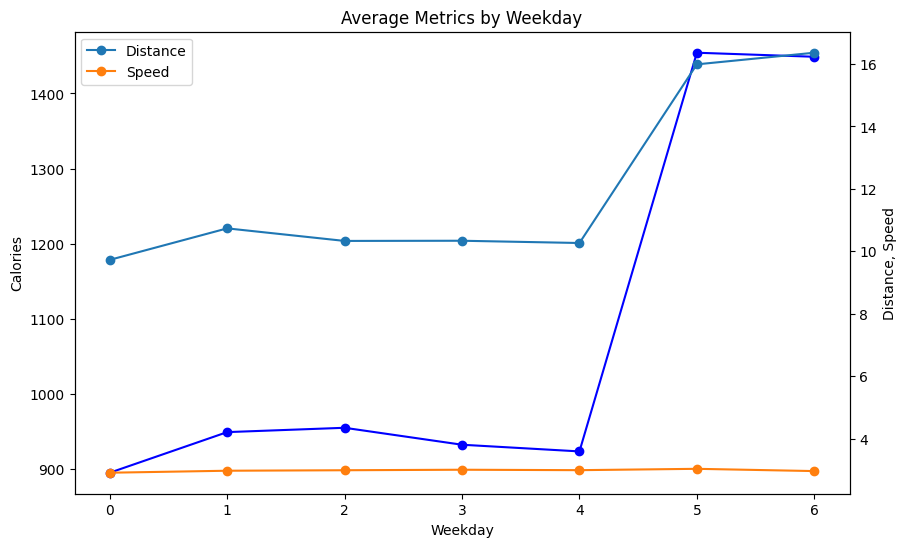

In [55]:
# Average Metrics by Weekday with Speed and Distance on the Right Axis
plt.figure(figsize=(10, 6))
ax = avg_metrics_weekday['Calories'].plot(color='blue', marker='o')
plt.ylabel('Calories')

# Twin axis for speed and distance
ax2 = ax.twinx()
avg_metrics_weekday[['Distance', 'Average Speed']].plot(ax=ax2, marker='o')

plt.title("Average Metrics by Weekday")
plt.xlabel("Weekday (0=Monday, 6=Sunday)")
ax.set_ylabel('Calories')
ax2.set_ylabel('Distance, Speed')
plt.legend(['Distance', 'Speed'], loc='upper left')
plt.show()


**General Trends**:
- The average distances run vary from about 9.73 km to 16.36 km across different days of the week.
- The average speed ranges approximately from 2.91 to 3.03 km/h.
- Calories burned per run range from about 895 to 1,454.

**Specific Insights**:
- **Calories Burned**: The highest average calories burned occur on Saturday (5), while the lowest is on Monday (0). This might indicate more intense or longer runs on Saturdays, possibly due to more free time.
- **Distance Covered**: The longest average distance is also on Sunday (6), suggesting that weekends might be preferred for longer runs. The shortest average distance is on Monday (0), which could be a rest day or a day for shorter, recovery runs.
- **Average Speed**: The fastest average speed is observed on Saturday (5), while the slowest is on Monday (0). This aligns with the trend that more intense workouts might be happening on Saturdays.

**Weekly Patterns**:
- The data suggests a pattern where Monday might be a rest or recovery day, as it has the lowest metrics in all categories (calories, distance, and speed).
- The weekend, especially Saturday, seems to be the most active, with the highest calories burned, fastest speeds, and one of the longest distances.
- There's a noticeable uptick in all metrics towards the weekend, indicating a possible increase in running activity or intensity.

## Segmentation Analysis

In [58]:
# Defining the segmentation criteria
# For simplicity, we'll create 3 categories for each criterion

# Distance Segments
distance_bins = pd.qcut(df_run_clean['Distance'], 3, labels=['Short', 'Medium', 'Long'])

# Pace Segments (using Average Speed for simplicity)
pace_bins = pd.qcut(df_run_clean['Average Speed'], 3, labels=['Slow', 'Moderate', 'Fast'])

# Elevation Gain
elevation_bins = pd.qcut(df_run_clean['Elevation Gain'], 3, labels=['Low', 'Moderate', 'High'])

# Time of Day (assuming morning: 5-12, afternoon: 12-5, evening: 5-9, night: 9-5)
hour = df_run_clean['Activity Date'].dt.hour
time_of_day_bins = pd.cut(hour, bins=[-1, 5, 12, 17, 21, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening', 'Late Night'], right=True)

# Day of Week
day_of_week_bins = df_run_clean['Weekday'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Adding these segments to the dataframe
df_run_clean['Distance Segment'] = distance_bins
df_run_clean['Pace Segment'] = pace_bins
df_run_clean['Elevation Segment'] = elevation_bins
df_run_clean['Time of Day'] = time_of_day_bins
df_run_clean['Day of Week'] = day_of_week_bins

C:\Users\mhollington.AAS\AppData\Local\Temp\ipykernel_27840\3407833015.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run_clean['Distance Segment'] = distance_bins
C:\Users\mhollington.AAS\AppData\Local\Temp\ipykernel_27840\3407833015.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run_clean['Pace Segment'] = pace_bins
C:\Users\mhollington.AAS\AppData\Local\Temp\ipykernel_27840\3407833015.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

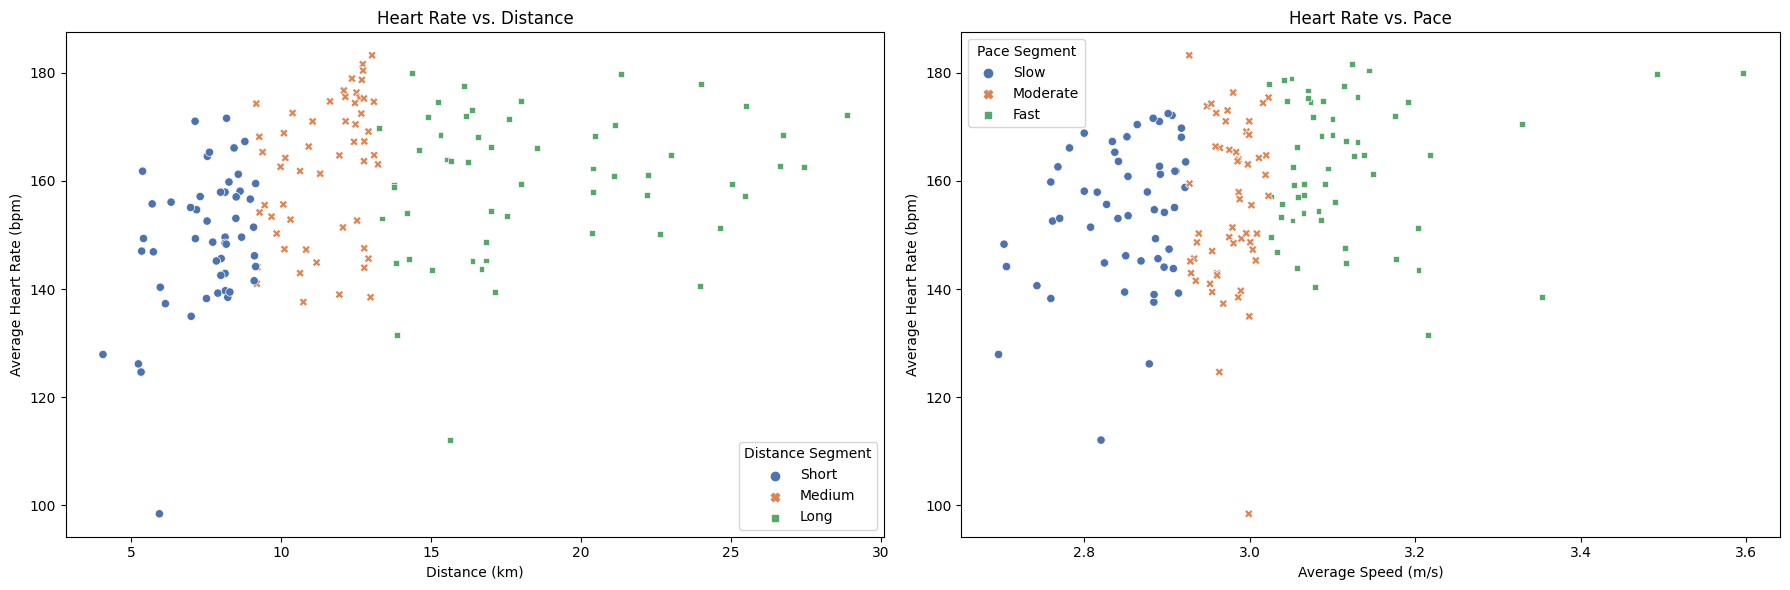

In [57]:
# Visualisations on Distance and Pace relative to Heart Rate

plt.figure(figsize=(18, 6))

# Distance vs Heart Rate
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_run_clean, x='Distance', y='Average Heart Rate', hue='Distance Segment', style='Distance Segment', palette="deep")
plt.title('Heart Rate vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Average Heart Rate (bpm)')

# Pace vs Heart Rate
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_run_clean, x='Average Speed', y='Average Heart Rate', hue='Pace Segment', style='Pace Segment', palette="deep")
plt.title('Heart Rate vs. Pace')
plt.xlabel('Average Speed (m/s)')
plt.ylabel('Average Heart Rate (bpm)')

plt.tight_layout()
plt.show()

**Heart Rate vs. Distance**
- Trend Observation: There appears to be a general trend where heart rate increases with longer distances. This suggests that longer runs may correspond to higher cardiovascular exertion.
- Segmentation Insight: Different distance segments show varied heart rate patterns. For instance, shorter runs might show a wider range of heart rates, possibly indicating varying intensities within short runs.
- Individual Variation: There is notable individual variability within each distance segment. This could be due to factors like personal fitness levels, running terrain, or running style.

**Heart Rate vs. Pace**
- Pace Relationship: The plot indicates a relationship between a faster pace and a higher heart rate. As pace increases, so does the average heart rate, reflecting increased physical exertion.
- Intensity Indication: Faster-paced runs, categorised as 'Fast', generally correlate with higher heart rates. This is consistent with the understanding that higher speeds require more energy and cardiovascular effort.
- Variability at Lower Speeds: At slower speeds, there’s a broader range of heart rates. This could suggest that slow runs are performed at varying intensities, possibly influenced by factors like warm-up or cool-down periods, or different objectives of the runs (e.g., endurance training vs. leisurely jogs).

**General Observations**
- These plots underscore the complexity of the relationship between heart rate and running metrics like distance and pace. While there are general trends, individual differences play a significant role.
- The data suggests that to optimise training and performance, runners might consider not just the distance or pace, but also how their heart rate responds to these variables.

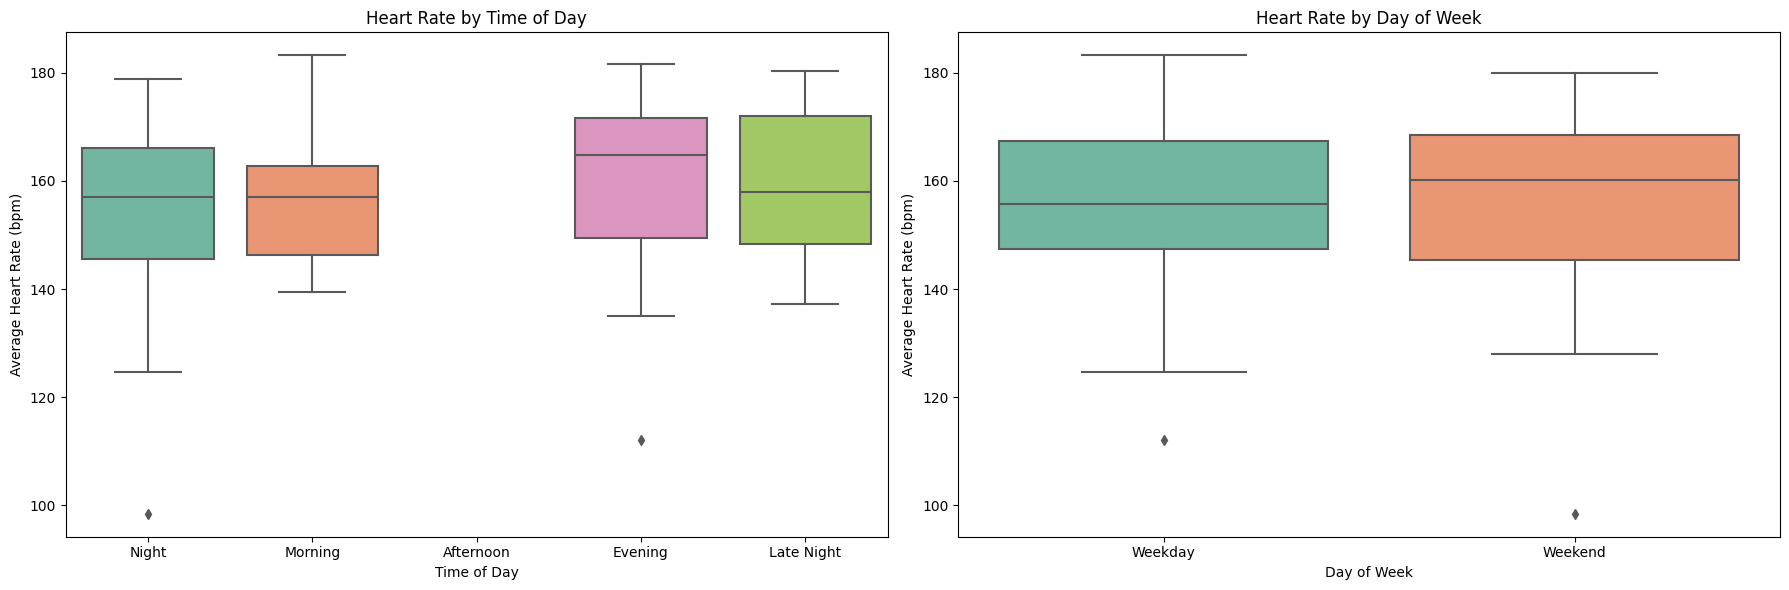

In [59]:
# Visualizations on Time of Day and Weekdays segmentation relative to Heart Rate

plt.figure(figsize=(18, 6))

# Heart Rate by Time of Day
plt.subplot(1, 2, 1)
sns.boxplot(data=df_run_clean, x='Time of Day', y='Average Heart Rate', palette="Set2")
plt.title('Heart Rate by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Heart Rate (bpm)')

# Heart Rate by Day of Week
plt.subplot(1, 2, 2)
sns.boxplot(data=df_run_clean, x='Day of Week', y='Average Heart Rate', palette="Set2")
plt.title('Heart Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Heart Rate (bpm)')

plt.tight_layout()
plt.show()

**Time of Day Impact**
- The time of day might influence heart rate, potentially due to varying energy levels or environmental factors like temperature. For instance, morning runs might show different heart rate patterns compared to evening runs.

**Weekday vs. Weekend Patterns** 
- Heart rate variations between weekdays and weekends could indicate differences in running intensity or motivation, perhaps influenced by work schedules, leisure time, or training plans.

**Individual Variability**
- There's a range of heart rates within each time segment, highlighting individual differences in physiological responses and running habits.